# Práctica 3a
## Gradiente,Combinador Lineal y Regresión

### Ejercicio 1

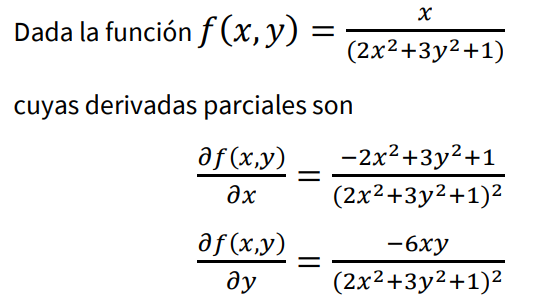

a) Indique el vector gradiente para 𝑥 = 1 e 𝑦 = −1





In [108]:
from sympy import symbols, diff

# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

In [109]:
# derivada parcial de f con respecto a x
df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

In [110]:
# derivada parcial de f con respecto a y
df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

In [111]:
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la funcion f en x e y
pz = f.evalf(subs = {x:px, y:py})
print("\nDada la función f(x,y) = ", f)
print("  en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )


Dada la función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
  en (1.000000,-1.000000) vale 0.166667

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,-1.000000) vale 0.055556

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,-1.000000) vale 0.166667



El gradiente es = (0.0555 , 101666)

b) Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una dirección en la cual la función crezca, qué acción tomaría?

i. Incrementar los valores de x e y

ii. Disminuir los valores de x e y

iii. Incrementar el valor de x y disminuir el de y

iv. Disminuir el valor de x e incrementar el de y


In [112]:
# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)

# derivada parcial de f con respecto a x
df_dx = diff(f, x)

# derivada parcial de f con respecto a y
df_dy = diff(f, y)

# coordenadas del punto a calcular
(px, py) = (0.20, -1)

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pw = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pw) )

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (0.200000,-1.000000) vale 0.235486

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (0.200000,-1.000000) vale 0.072088



Lo que hago es evaluar ambas derivadas parciales en el punto (0.20, -1) si:

fx > 0, conviene incrementar x

fx < 0, conviene disminuir x

fy > 0, conviene incrementar y

fy < 0, conviene disminuir y

Entonces en este caso al tener los valores 0.235486 para fx y 0.072088 para fy entonces la opción correcta es i. Incrementar los valores de x e y

c) Una vez elegida la dirección en b), el movimiento a realizar será una fracción del módulo del vector gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en la nueva ubicación?

In [113]:
alpha = 0.1
# 0.20 + 0.1 * 0.235486(fx), -1 + 0.1 * 0.072088(fy)
new_position = (px + alpha * pz, py + alpha * pw)
print("Nueva posición:", new_position)


Nueva posición: (0.223548635140331, -0.992791234140715)


d) Considere nuevamente las opciones del inciso b) pero ahora debe buscar una dirección, a partir de (𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?

ii. disminuir los valores de x y de y

e) Repita lo solicitado en c) para la dirección elegida en d) donde el objetivo fue hallar una ubicación donde la función tome un valor menor.

In [114]:
alpha = 0.1
# 0.20 - 0.1 * 0.235486(fx), -1 - 0.1 * 0.072088(fy)
new_position = (px - alpha * pz, py - alpha * pw)
print("Nueva posición:", new_position)

Nueva posición: (0.176451364859669, -1.00720876585928)


f) Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la función 𝑓(𝑥, 𝑦) que se observa en la figura.

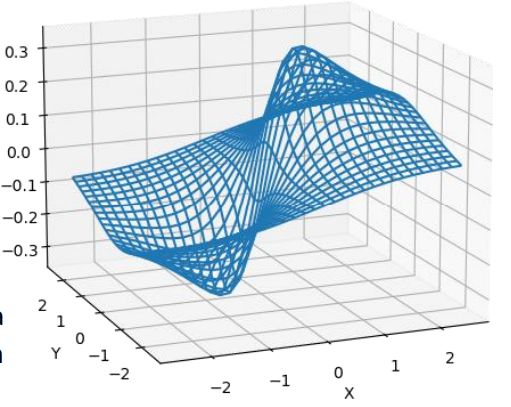

In [115]:
alpha = 0.1
iterations = 100
px = 0.2
py = -1

for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion OPUESTA al gradiente (por eso se resta)
    px = px - alpha * grad_x
    py = py - alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

print( " ")
print (f'Resultado final: x{px}, y{py}, f(x,y) = {f_val}')

 
Resultado final: x-0.711096959054583, y-0.00193827784364301, f(x,y) = -0.353545812006922


g) Idem f) para el máximo de la función 𝑓(𝑥, 𝑦).

In [116]:
alpha = 0.1
iterations = 100
px = 0.2
py = -1

for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion OPUESTA al gradiente (por eso se resta)
    px = px + alpha * grad_x
    py = py + alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

print( " ")
print (f'Resultado final: x{px}, y{py}, f(x,y) = {f_val}')

 
Resultado final: x0.708187877814801, y-0.000273726833517453, f(x,y) = 0.353552938327043


### Ejercicio 2
El precio de una vivienda está dado por dos factores, la proximidad a centros comerciales, financieros, vías y demás que se mide a través del factor j, y de la condición misma de la vivienda que se mide por el factor k. La relación entre estos factores y el precio de la vivienda en un barrio determinado está dada por:

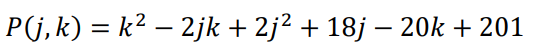

donde el precio está dado en miles de dólares. 
Utilice la técnica de descenso de gradiente para determinar los valores de j y k que minimizan el precio de la vivienda.

In [117]:
# establece variables a usar en la funcion
k, j = symbols('k j', real=True)

# define la funcion
f = k**2 - 2*k*j + 2*j**2 + 18*j -20*k + 201

# derivada parcial de f con respecto a k
df_dk = diff(f, k)

# derivada parcial de f con respecto a j
df_dj = diff(f, j)

# descenso de gradiente para encontrar el minimo
alpha = 0.1
iterations = 100
px = 0
py = 0

for i in range (iterations):

    grad_k = df_dk.evalf(subs={k:px, j:py})
    grad_j = df_dj.evalf(subs={k:px, j:py})

    px = px - alpha * grad_k
    py = py - alpha * grad_j

    f_val = f.evalf(subs={k:px, j:py})

print( " ")
print (f'Resultado final: k{px}, j{py}, f(k,j) = {f_val}')

 
Resultado final: k10.9970259562883, j0.998161939902154, f(k,j) = 100.000004668924


### Ejercicio 3
A continuación, se presentan datos de entrenamiento y tiempo promedio de un recorrido de corredores para una distancia fija. Los datos están organizados en una tabla con las horas de entrenamiento semanales y el tiempo promedio en minutos para completar el recorrido:

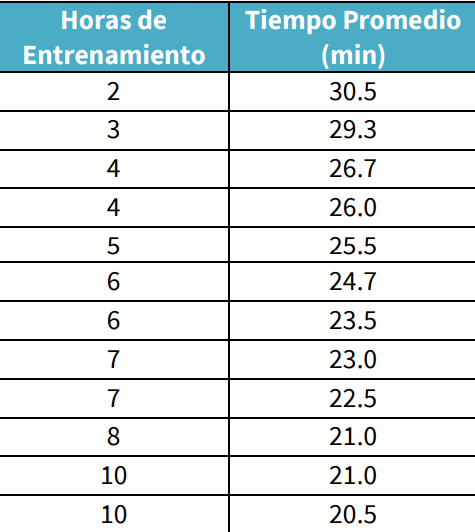

A partir de los datos de entrenamiento y tiempos de recorrido de los corredores, se desea obtener la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija
a partir de las horas de entrenamiento semanales. Responder:

a) Calcule la correlación lineal entre estas dos variables y dibuje el diagrama de dispersión correspondiente. ¿La recta de regresión será de utilidad?


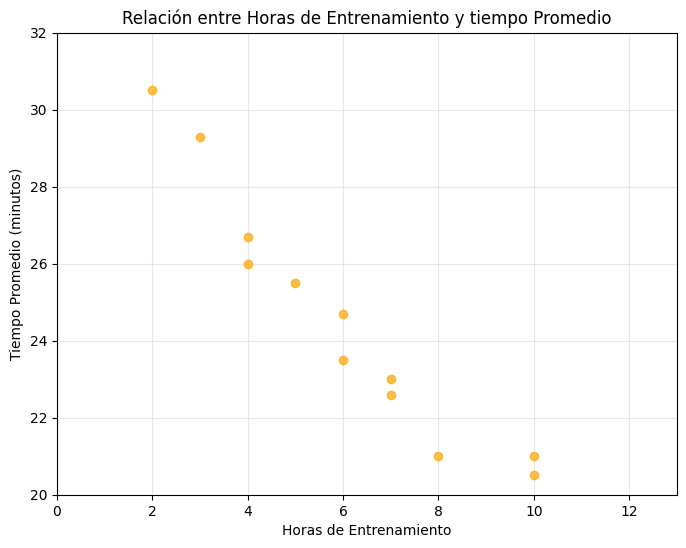

In [118]:
import numpy as np
import matplotlib.pyplot as plt

horas_entrenamiento = [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10]
tiempo_promedio = [30.5, 29.3, 26.7, 26.0, 25.5, 24.7, 23.5, 23.0, 22.6, 21.0, 21.0, 20.5]

X = np.array(horas_entrenamiento)
Y = np.array(tiempo_promedio)

# Grafica dispersión
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'o', color='orange', alpha=0.7, markersize=6)
plt.title('Relación entre Horas de Entrenamiento y tiempo Promedio')
plt.xlabel('Horas de Entrenamiento')
plt.ylabel('Tiempo Promedio (minutos)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 13)
plt.ylim(20, 32)
plt.show()

In [119]:
# Cálculo del coeficiente de correlación
correlacion = np.corrcoef(X, Y)[0, 1]
print(f"Coeficiente de correlación (Pearson): {correlacion:.3f}")

Coeficiente de correlación (Pearson): -0.960


b) Indique la ecuación del error cuadrático medio que se debería minimizar si se utilizara la técnica de descenso de gradiente.

En la teoria 

c) Indique la ecuación de error que se minimiza al utilizar la técnica de descenso de gradiente estocástico. ¿Qué ventaja tiene su uso con respecto a la ecuación indicada en b)?

No es muy preciso pero es más rápido

d) Utilice la técnica de descenso de gradiente estocástico para obtener los coeficientes de la recta de regresión que permita predecir el tiempo promedio que un corredor tardará en recorrer la distancia fija a partir de las horas de entrenamiento semanales


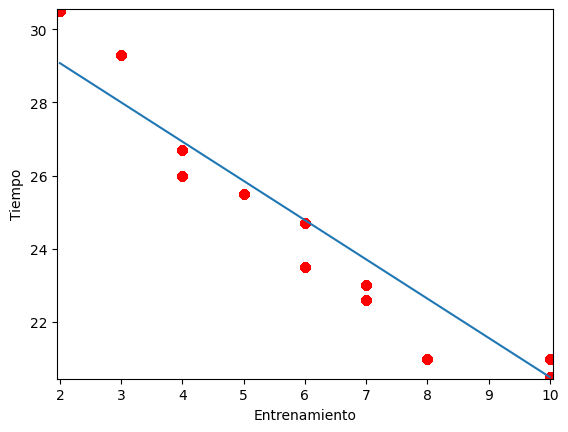

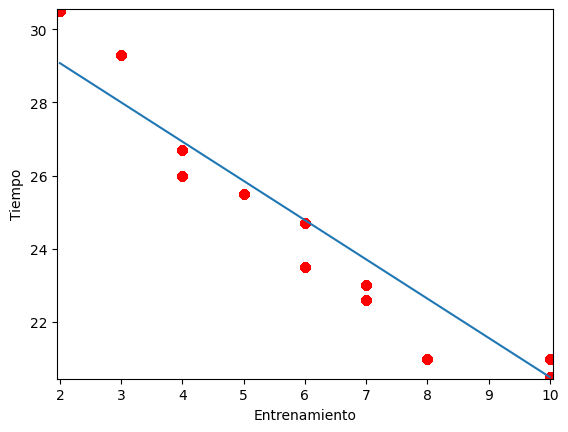

In [120]:

from ClassNeuronaLineal import NeuronaLineal
import numpy as np

x_train = X.reshape(-1,1)    
y_train = Y.reshape(-1,1) 

# Entrena neurona
modelo = NeuronaLineal(alpha=0.01, n_iter=500, cotaE=0.001, draw=1, title=['Entrenamiento', 'Tiempo'])
modelo = modelo.fit(x_train, y_train)

e) Utilice la recta obtenida en d) para predecir el tiempo promedio que tardará en recorrer la distancia fija un corredor que entrena 9 horas semanales.

In [121]:
horas = 9 # horas semanales dedicadas
tiempo = modelo.predict([horas]) # prediccion del tiempo de recorrido en minutos

print('Quien dedicó %d horas de entrenamiento tradará %d minutos en hacer el recorrido\n' % (horas, tiempo[0]))

Quien dedicó 9 horas de entrenamiento tradará 21 minutos en hacer el recorrido



### Ejercicio 4
El archivo ccpp.csv contiene 9568 datos de una central de ciclo combinado recolectados entre 2006 y 2011. Usando la totalidad de los ejemplos se entrenaron 5 combinadores lineales con el objetivo de predecir el 
valor del atributo PE correspondiente a la cantidad de energía producida a partir del atributo AT (más detalles de este conjunto de datos aquí). Indique cuáles son los dos combinadores lineales con menor error cuadrático promedio a la hora de predecir el valor de PE en función de AT:

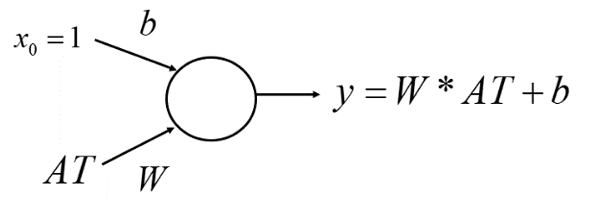

a) W = -2.00 ; b= 500 

b) W = -2.21 ; b= 498 

c) W = -2.30 ; b= 497  

d) W = -2.22 ; b=496.5 

e) W = -2.16 ; b=496.91 

In [122]:
import numpy as np
import pandas as pd

df = pd.read_csv('CCPP.csv')

X = np.array(df['AT'])  
Y = np.array(df['PE'])  

parametros = {
    ("a", -2.00, 500),
    ("b", -2.21, 498),
    ("c", -2.30, 497),
    ("d", -2.22, 496.5),
    ("e", -2.16, 496.91)
}

In [123]:
def calcular_ecm(w, b, AT, PE):
    predicciones = w * AT + b
    return np.mean((PE - predicciones) ** 2)

In [124]:
for nombre, w, b in parametros:
    ecm = calcular_ecm(w, b, X, Y)
    print(f"Parámetros {nombre}: w = {w}, b = {b} => ECM = {ecm:.4f}")

Parámetros a: w = -2.0, b = 500 => ECM = 71.1626
Parámetros c: w = -2.3, b = 497 => ECM = 36.9194
Parámetros d: w = -2.22, b = 496.5 => ECM = 31.7856
Parámetros e: w = -2.16, b = 496.91 => ECM = 29.4485
Parámetros b: w = -2.21, b = 498 => ECM = 29.5571


### Ejercicio 5
A partir de los ejemplos del archivo automobile-simple.csv, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo “price”) en función del tamaño del motor (atributo “engine-size”):

a) Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo “price” utilizando el valor promedio. 

In [125]:
df = pd.read_csv('automobile-simple.csv')

df['price'].fillna(df['price'].mean(), inplace=True)

C:\Users\milen\AppData\Local\Temp\ipykernel_24508\4214161322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


b) Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal: 

i. Sin normalizar los atributos.  

ii. Normalizando ambos atributos linealmente.

iii. Normalizando ambos atributos utilizando media y desvío. 

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

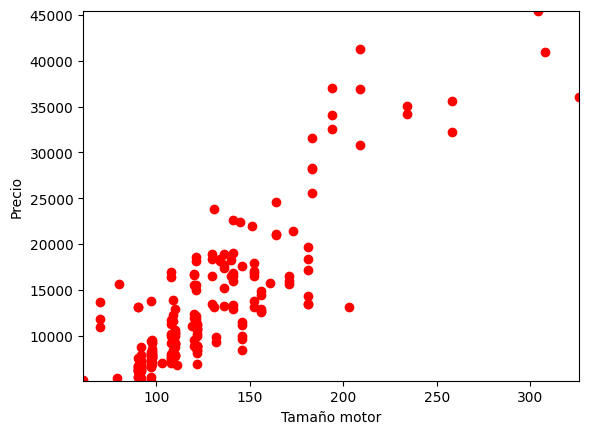

Errores del modelo1: 
  0 => nan


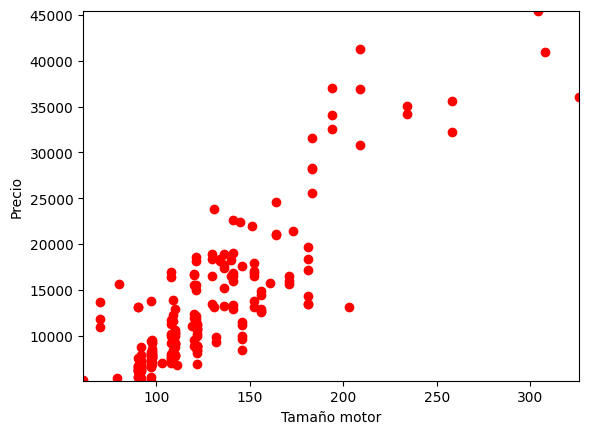

In [126]:
X = df['engine-size'].values
Y = df['price'].values

modelo1 = NeuronaLineal(alpha=0.01, n_iter=1000, cotaE=0.01, draw=1, title=['Tamaño motor', 'Precio'])
modelo1.fit(X.reshape(-1,1), Y.reshape(-1,1))

print("Errores del modelo1: ")
for i, err in enumerate(modelo1.errors_):
    print('%3d => %f' % (i, err[0]))

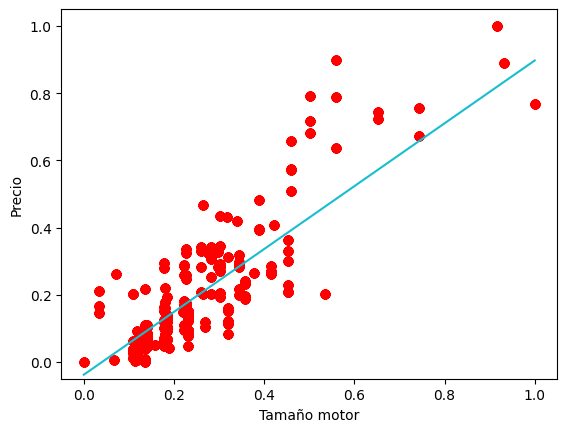

Errores del modelo2: 
  0 => 21.651557
  1 => 5.654365
  2 => 5.046755
  3 => 4.758404
  4 => 4.509368
  5 => 4.284088
  6 => 4.079285
  7 => 3.892986
  8 => 3.723504
  9 => 3.569317
 10 => 3.429043
 11 => 3.301422
 12 => 3.185313
 13 => 3.079674
 14 => 2.983559
 15 => 2.896107
 16 => 2.816537
 17 => 2.744135
 18 => 2.678254
 19 => 2.618306
 20 => 2.563754
 21 => 2.514112
 22 => 2.468936
 23 => 2.427822
 24 => 2.390405
 25 => 2.356351
 26 => 2.325357
 27 => 2.297145
 28 => 2.271467
 29 => 2.248092
 30 => 2.226814
 31 => 2.207444
 32 => 2.189809
 33 => 2.173753
 34 => 2.159135
 35 => 2.145824
 36 => 2.133703
 37 => 2.122666
 38 => 2.112614
 39 => 2.103458


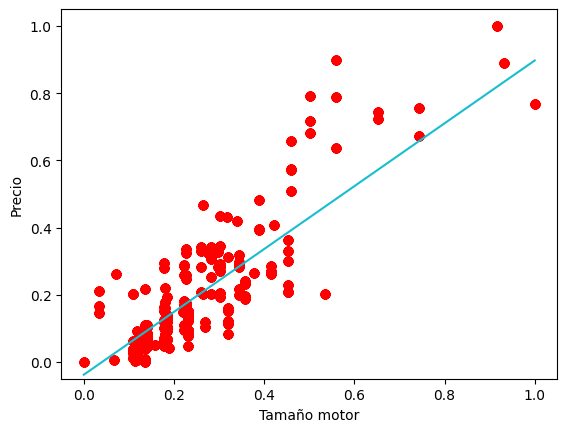

In [127]:
from sklearn.preprocessing import MinMaxScaler

X = df['engine-size'].values
Y = df['price'].values

# Normalizacion lineal
scaler_X_L = MinMaxScaler()
scaler_Y_L = MinMaxScaler()

X = scaler_X_L.fit_transform(X.reshape(-1, 1))
Y = scaler_Y_L.fit_transform(Y.reshape(-1, 1))

modelo2 = NeuronaLineal(alpha=0.01, n_iter=1000, cotaE=0.01, draw=1, title=['Tamaño motor', 'Precio'])
modelo2.fit(X.reshape(-1,1), Y.reshape(-1,1))

print("Errores del modelo2: ")
for i, err in enumerate(modelo2.errors_):
    print('%3d => %f' % (i, err[0]))

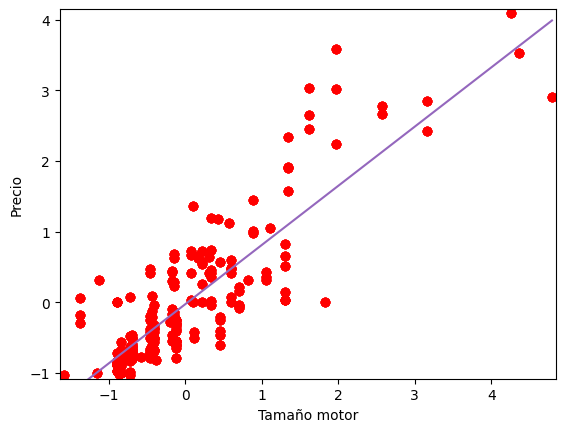

Errores del modelo3: 
  0 => 70.738969
  1 => 54.614412
  2 => 54.068413
  3 => 54.021975
  4 => 54.016723


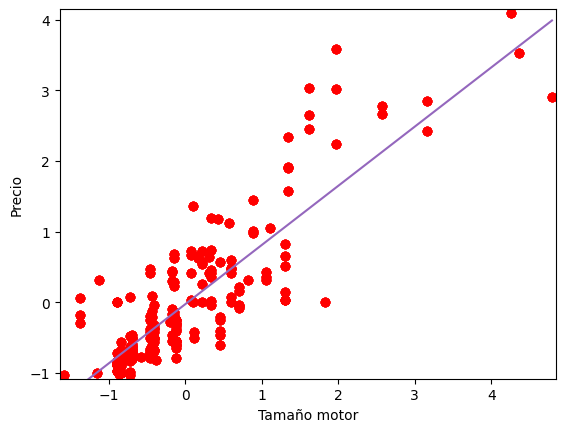

In [128]:
from sklearn.preprocessing import StandardScaler

X = df['engine-size'].values
Y = df['price'].values

# Normalizacion STANDARD
scaler_X_S = StandardScaler()
scaler_Y_S = StandardScaler()

X = scaler_X_S.fit_transform(X.reshape(-1, 1))
Y = scaler_Y_S.fit_transform(Y.reshape(-1, 1))

modelo3 = NeuronaLineal(alpha=0.01, n_iter=1000, cotaE=0.01, draw=1, title=['Tamaño motor', 'Precio'])
modelo3.fit(X.reshape(-1,1), Y.reshape(-1,1))

print("Errores del modelo3: ")
for i, err in enumerate(modelo3.errors_):
    print('%3d => %f' % (i, err[0]))

Voy a predecir el precio para un motor de 130

In [130]:
tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
prediccion1 = modelo1.predict( entrada )
print (f'El precio predicho para el motor de 130 es de {prediccion1}')

tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
entrada = scaler_X_L.transform(entrada)
prediccion2 = modelo2.predict( entrada )
prediccion2 = scaler_Y_L.inverse_transform([prediccion2])
print (f'El precio predicho para el motor de 130 es de {prediccion2}')

tamaño_motor = 130 #quiero predecir cual es el precio de un motor de 130
entrada = np.array([tamaño_motor]).reshape((-1,1)) #transformo la entrada
entrada = scaler_X_S.transform(entrada)
prediccion3 = modelo3.predict( entrada )
prediccion3 = scaler_Y_S.inverse_transform([prediccion3])
print (f'El precio predicho para el motor de 130 es de {prediccion3}')

precio_medio = df['price'].mean()
print(f'El precio medio de los coches es de {precio_medio}')

El precio predicho para el motor de 130 es de [nan]
El precio predicho para el motor de 130 es de [[13395.07305686]]
El precio predicho para el motor de 130 es de [[13480.48304076]]
El precio medio de los coches es de 13207.129353233831


La normalizacion lineal se acerca un poco mas al precio promedio pero igualmente los resultados son bastante parecidos con respecto a la standard